In [91]:
import pandas as pd
import seaborn as sns
import numpy as np 
import matplotlib.pyplot as plt

# Levantamos el dataset

This dataset provides a list of lyrics from 1950 to 2019 describing music metadata as sadness, danceability, loudness, acousticness, etc. We also provide some informations as lyrics which can be used to natural language processing.

In [92]:
music_df = pd.read_csv('tcc_ceds_music.csv', index_col="Unnamed: 0") # Todas las canciones tienen Unnamed y es único.

In [93]:
music_df.shape

(28372, 30)

In [94]:
music_df.head()

,artist_name,track_name,release_date,genre,lyrics,len,dating,violence,world/life,night/time,...,sadness,feelings,danceability,loudness,acousticness,instrumentalness,valence,energy,topic,age
0,mukesh,mohabbat bhi jhoothi,1950,pop,hold time feel break feel untrue convince spea...,95,0.000598,0.063746,0.000598,0.000598,...,0.380299,0.117175,0.357739,0.454119,0.997992,0.901822,0.339448,0.137110,sadness,1.0
4,frankie laine,i believe,1950,pop,believe drop rain fall grow believe darkest ni...,51,0.035537,0.096777,0.443435,0.001284,...,0.001284,0.001284,0.331745,0.647540,0.954819,0.000002,0.325021,0.263240,world/life,1.0
6,johnnie ray,cry,1950,pop,sweetheart send letter goodbye secret feel bet...,24,0.002770,0.002770,0.002770,0.002770,...,0.002770,0.225422,0.456298,0.585288,0.840361,0.000000,0.351814,0.139112,music,1.0
10,pérez prado,patricia,1950,pop,kiss lips want stroll charm mambo chacha merin...,54,0.048249,0.001548,0.001548,0.001548,...,0.225889,0.001548,0.686992,0.744404,0.083935,0.199393,0.775350,0.743736,romantic,1.0
12,giorgos papadopoulos,apopse eida oneiro,1950,pop,till darling till matter know till dream live ...,48,0.001350,0.001350,0.417772,0.001350,...,0.068800,0.001350,0.291671,0.646489,0.975904,0.000246,0.597073,0.394375,romantic,1.0


In [95]:
music_df.tail()

,artist_name,track_name,release_date,genre,lyrics,len,dating,violence,world/life,night/time,...,sadness,feelings,danceability,loudness,acousticness,instrumentalness,valence,energy,topic,age
82447,mack 10,10 million ways,2019,hip hop,cause fuck leave scar tick tock clock come kno...,78,0.001350,0.001350,0.001350,0.001350,...,0.065664,0.001350,0.889527,0.759711,0.062549,0.000000,0.751649,0.695686,obscene,0.014286
82448,m.o.p.,ante up (robbin hoodz theory),2019,hip hop,minks things chain ring braclets yap fame come...,67,0.001284,0.001284,0.035338,0.001284,...,0.001284,0.001284,0.662082,0.789580,0.004607,0.000002,0.922712,0.797791,obscene,0.014286
82449,nine,whutcha want?,2019,hip hop,get ban get ban stick crack relax plan attack ...,77,0.001504,0.154302,0.168988,0.001504,...,0.001504,0.001504,0.663165,0.726970,0.104417,0.000001,0.838211,0.767761,obscene,0.014286
82450,will smith,switch,2019,hip hop,check check yeah yeah hear thing call switch g...,67,0.001196,0.001196,0.001196,0.001196,...,0.001196,0.001196,0.883028,0.786888,0.007027,0.000503,0.508450,0.885882,obscene,0.014286
82451,jeezy,r.i.p.,2019,hip hop,remix killer alive remix thriller trap bitch s...,83,0.001012,0.075202,0.001012,0.001012,...,0.001012,0.033995,0.828875,0.674794,0.015862,0.000000,0.475474,0.492477,obscene,0.014286


The main information retained was the artist name, track name, release date, genre and track id. The track id is a unique id for each searched track. We used the ’track id’ as input to the spotipy’s audio features tool and we kept only some of these features. The selected features were:
* **Acousticness**: Presence of acoustic instruments;
* **Danceability**: how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity;
* **Loudness**: The average loudness in decibels (dB) across the entire track;
* **Instrumentalness**: A high value describes whether a track contains fewer vocals;
* **Valence**: High (low) values means that the track is more happy, euphoric (sad,
angry);
* **Energy**: Measures intensity and activity of music. Energetic tracks will be fast, loud and noisy.

These features were scaled between 0 and 1.

https://developer.spotify.com/documentation/web-api/reference/#/operations/get-audio-features

## Features

In [96]:
music_df.columns.tolist()

['artist_name',
 'track_name',
 'release_date',
 'genre',
 'lyrics',
 'len',
 'dating',
 'violence',
 'world/life',
 'night/time',
 'shake the audience',
 'family/gospel',
 'romantic',
 'communication',
 'obscene',
 'music',
 'movement/places',
 'light/visual perceptions',
 'family/spiritual',
 'like/girls',
 'sadness',
 'feelings',
 'danceability',
 'loudness',
 'acousticness',
 'instrumentalness',
 'valence',
 'energy',
 'topic',
 'age']

* age es un numero entre 0 y 1 que mide lo viejo que es
* len es la cantidad de palabras
* hay una variable categorica topic
* al parecer no hay data de la duración de las canciones. Se puede recuperar seguro. Hace falta?

In [97]:
music_df = music_df.rename(columns={'len': 'words'}) # es la cantidad de palabras

In [98]:
music_df.describe()

,release_date,words,dating,violence,world/life,night/time,shake the audience,family/gospel,romantic,communication,...,like/girls,sadness,feelings,danceability,loudness,acousticness,instrumentalness,valence,energy,age
count,28372.000000,28372.000000,28372.000000,28372.000000,28372.000000,28372.000000,28372.000000,28372.000000,28372.000000,28372.000000,...,28372.000000,28372.000000,28372.000000,28372.000000,28372.000000,2.837200e+04,28372.000000,28372.000000,28372.000000,28372.000000
mean,1990.236888,73.028444,0.021112,0.118396,0.120973,0.057387,0.017422,0.017045,0.048681,0.076680,...,0.028057,0.129389,0.030996,0.533348,0.665249,3.392347e-01,0.080049,0.532864,0.569875,0.425187
std,18.487463,41.829831,0.052370,0.178684,0.172200,0.111923,0.040670,0.041966,0.106095,0.109538,...,0.058473,0.181143,0.071652,0.173218,0.108434,3.267143e-01,0.211245,0.250972,0.244385,0.264107
min,1950.000000,1.000000,0.000291,0.000284,0.000291,0.000289,0.000284,0.000289,0.000284,0.000291,...,0.000284,0.000284,0.000289,0.005415,0.000000,2.811248e-07,0.000000,0.000000,0.000000,0.014286
25%,1975.000000,42.000000,0.000923,0.001120,0.001170,0.001032,0.000993,0.000923,0.000975,0.001144,...,0.000975,0.001144,0.000993,0.412975,0.595364,3.423598e-02,0.000000,0.329143,0.380361,0.185714
50%,1991.000000,63.000000,0.001462,0.002506,0.006579,0.001949,0.001595,0.001504,0.001754,0.002632,...,0.001595,0.005263,0.001754,0.538612,0.679050,2.259028e-01,0.000085,0.539365,0.580567,0.414286
75%,2007.000000,93.000000,0.004049,0.192608,0.197793,0.065842,0.010002,0.004785,0.042301,0.132136,...,0.026622,0.235113,0.032622,0.656666,0.749026,6.325298e-01,0.009335,0.738252,0.772766,0.642857
max,2019.000000,199.000000,0.647706,0.981781,0.962105,0.973684,0.497463,0.545303,0.940789,0.645829,...,0.594459,0.981424,0.958810,0.993502,1.000000,1.000000e+00,0.996964,1.000000,1.000000,1.000000


In [99]:
sns.set(style="darkgrid")

### Genero

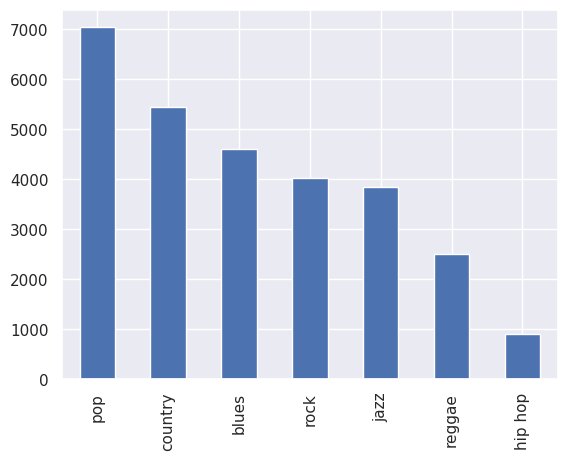

In [100]:
music_df['genre'].value_counts().plot.bar();

* Hay canciones con más de un genero?

In [101]:
len(music_df[['artist_name', 'track_name']])-len(music_df[['artist_name', 'track_name']].drop_duplicates())

0

Al parecer no.

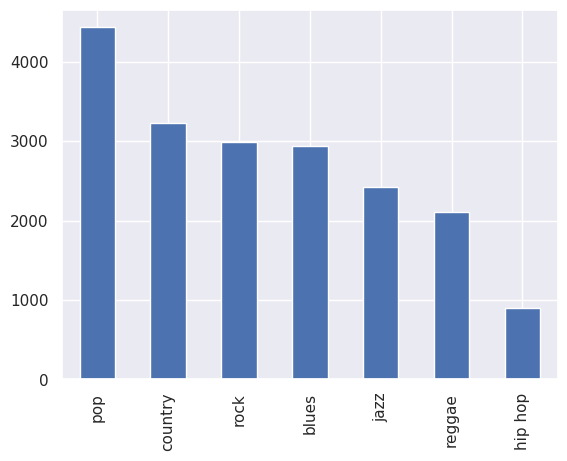

In [102]:
canciones_modernas = music_df[music_df["release_date"] > 1980]
canciones_modernas["genre"].value_counts().plot.bar();

### Words (Cantidad de Palabras)

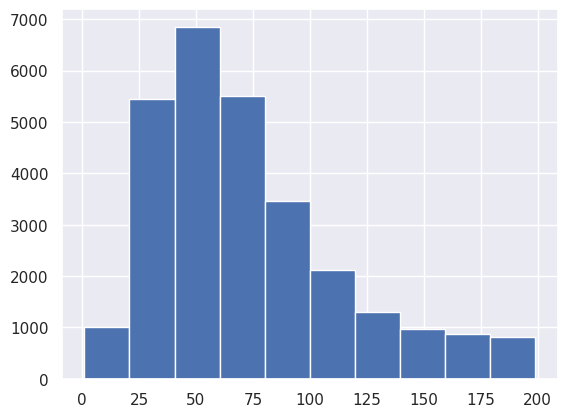

In [103]:
music_df['words'].hist();

### Release Date

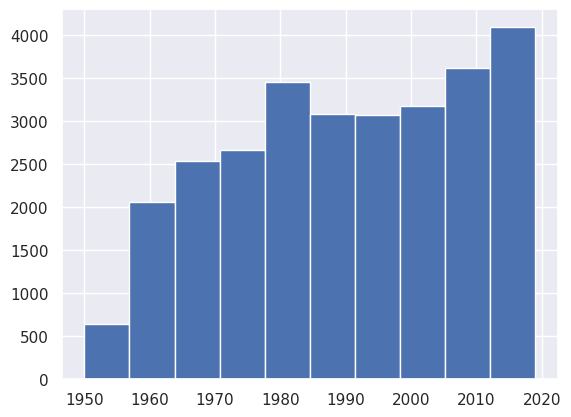

In [104]:
music_df['release_date'].hist();

Sacamos data muy vieja?

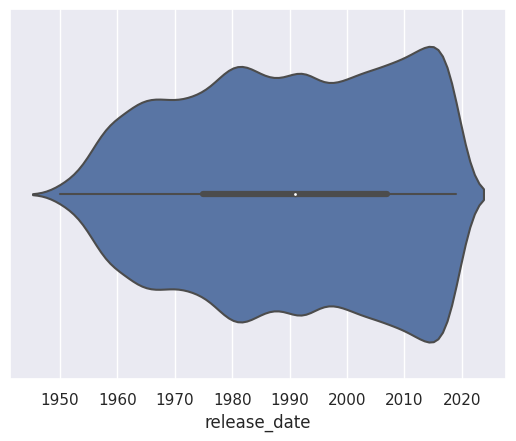

In [105]:
sns.violinplot(data=music_df, x="release_date");

### Artist_Name

In [106]:
artists = music_df["artist_name"].value_counts().sort_values(ascending = False)
artists

johnny cash           190
ella fitzgerald       188
dean martin           146
willie nelson         131
george jones          107
                     ... 
washed out              1
turi                    1
proof                   1
david crowder band      1
$uicideboy$             1
Name: artist_name, Length: 5426, dtype: int64

In [107]:
johnny_music = music_df[music_df["artist_name"] == 'johnny cash']

In [108]:
johnny_music['track_name'].drop_duplicates() #al parecer no tiene repetidas

20344                          the little drummer boy
20382                                 the loving gift
20416                          tennessee flat top box
20450                                  all over again
20574    i was there when it happened (2017 remaster)
                             ...                     
35007                                   it's all over
35071                               i came to believe
35081                             a legend in my time
36384                                  ain't no grave
36465                                  redemption day
Name: track_name, Length: 190, dtype: object

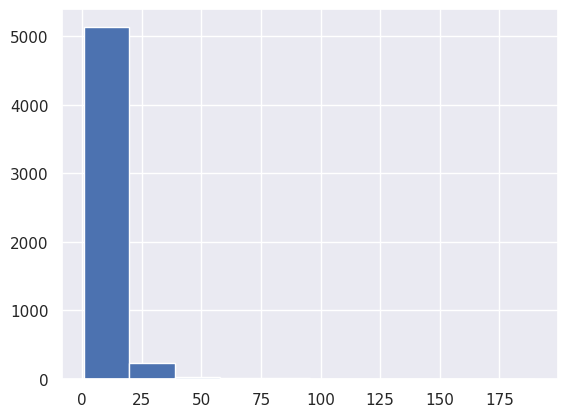

In [109]:
artists.hist();

### Density plot per genre

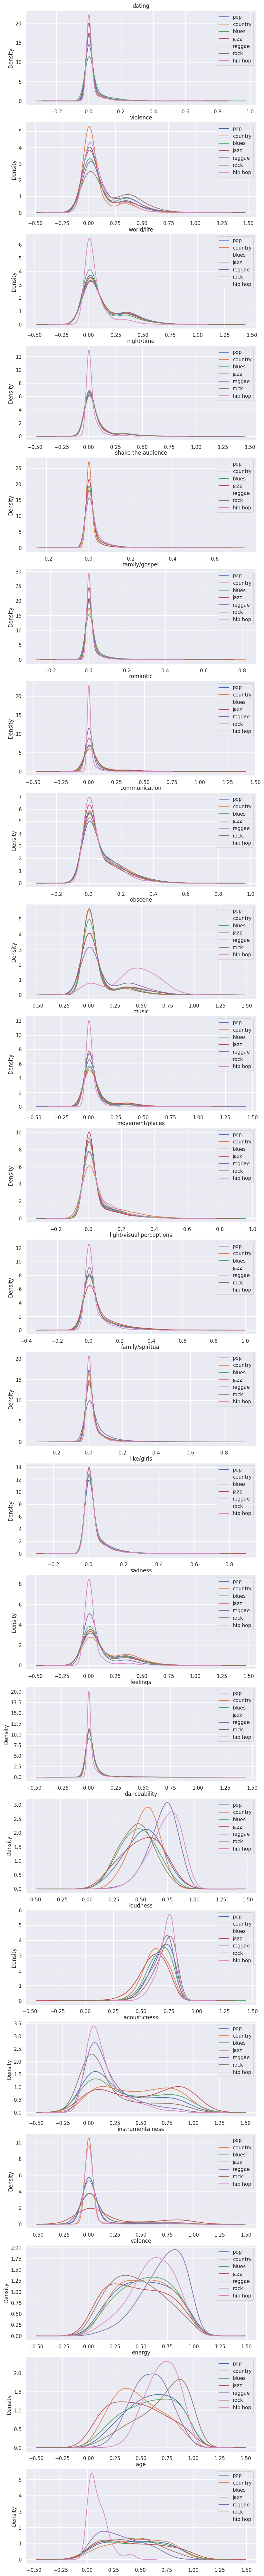

In [110]:
genres = music_df['genre'].drop_duplicates().tolist()

features_numericas = music_df.columns.drop(['artist_name','track_name','release_date','genre','lyrics','words','topic'])
fig, axes = plt.subplots(nrows= len(features_numericas), figsize=(8, 80))
fig.tight_layout()
for i, feature in enumerate(features_numericas):
        music_df_per_genre = music_df[music_df.genre == genre]
        
        music_df_per_genre[feature].plot.kde(bw_method = 0.4, label = genre, ax = axes[i], title = feature)
        axes[i].legend()
        

In [111]:
for feature in music_df.columns.drop(['artist_name','track_name','release_date','genre','lyrics','words','topic']):
    print(feature)

dating
violence
world/life
night/time
shake the audience
family/gospel
romantic
communication
obscene
music
movement/places
light/visual perceptions
family/spiritual
like/girls
sadness
feelings
danceability
loudness
acousticness
instrumentalness
valence
energy
age


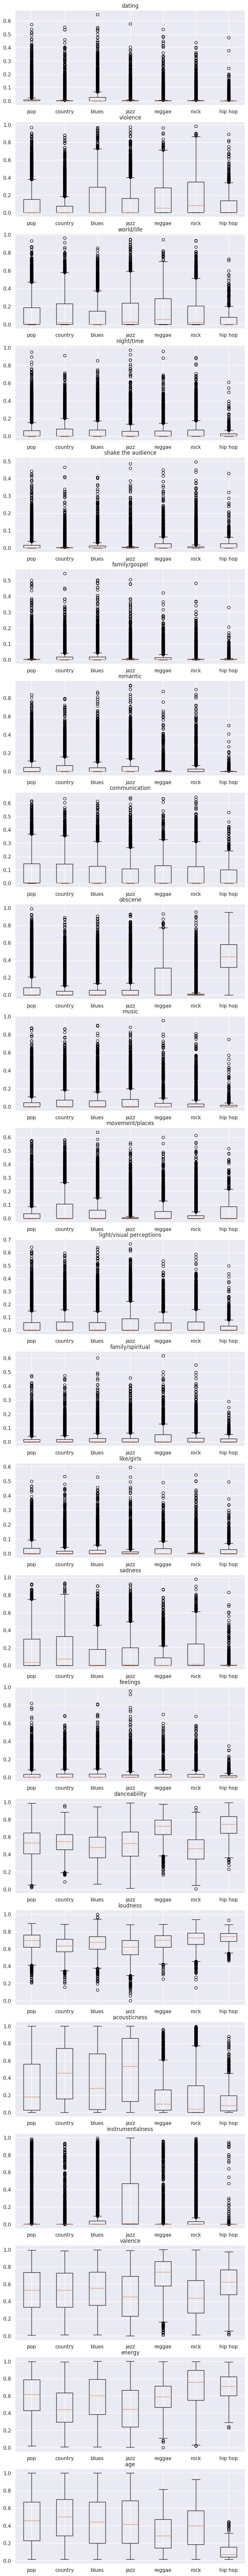

In [112]:
fig, axes = plt.subplots(nrows= len(features_numericas), figsize=(8, 80))
fig.tight_layout()
for i, feature in enumerate(features_numericas):
    data = []
    for genre in genres:
        music_df_per_genre = music_df[music_df.genre == genre][feature]
        data.append(music_df_per_genre)  

    axes[i].boxplot(data)
    axes[i].set_title(feature)
    axes[i].set_xticklabels(genres)
    


### Lyrics

In [113]:
music_df[['lyrics','track_name']]

,lyrics,track_name
0,hold time feel break feel untrue convince spea...,mohabbat bhi jhoothi
4,believe drop rain fall grow believe darkest ni...,i believe
6,sweetheart send letter goodbye secret feel bet...,cry
10,kiss lips want stroll charm mambo chacha merin...,patricia
12,till darling till matter know till dream live ...,apopse eida oneiro
...,...,...
82447,cause fuck leave scar tick tock clock come kno...,10 million ways
82448,minks things chain ring braclets yap fame come...,ante up (robbin hoodz theory)
82449,get ban get ban stick crack relax plan attack ...,whutcha want?
82450,check check yeah yeah hear thing call switch g...,switch


In [114]:
music_df[['lyrics','track_name']].iloc[0]['lyrics']

'hold time feel break feel untrue convince speak voice tear try hold hurt try forgive okay play break string feel heart want feel tell real truth hurt lie worse anymore little turn dust play house ruin run leave save like chase train late late tear try hold hurt try forgive okay play break string feel heart want feel tell real truth hurt lie worse anymore little run leave save like chase train know late late play break string feel heart want feel tell real truth hurt lie worse anymore little know little hold time feel'

* Faltan conectores no? Al parecer es hindu y esta traducido. 
* Rompera fast text? yo creo que no

We started cleaning the texts by identifying the language using Google’s library language-detection and removed all non-English texts. 

We cleaned the remaining texts consisted of removing symbols, numbers, and stop words like common English words and proper nouns.

The remaining words were lemmatized to its canonical form using WordNet Lemmatizer [Fellbaum 2005] provided by NLTK package[Bird 2009]. 

# Split dataset

### Como hacer el split train/test? Pablo nos recomendo hacer por fecha de salida. 
* Usamos desde 1950 hasta 2018? O por porcentaje 80/20?

In [115]:
music_df = music_df.sort_values(by = 'release_date', ascending = True)
train, test= np.split(music_df, [int(.91 *len(music_df))])

In [116]:
train['release_date'].min(), train['release_date'].max(), train.shape[0]

(1950, 2015, 25818)

In [117]:
test['release_date'].min(), test['release_date'].max(), test.shape[0]

(2015, 2019, 2554)

In [118]:
#Version hasta 2018. Es mucho mas que el 80 por ciento, cercano al 98.
#train, test = music_df[music_df['release_date'] < 2018], music_df[music_df['release_date'] > 2018]
#train.shape[0], test.shape[0]
#(27185, 534)

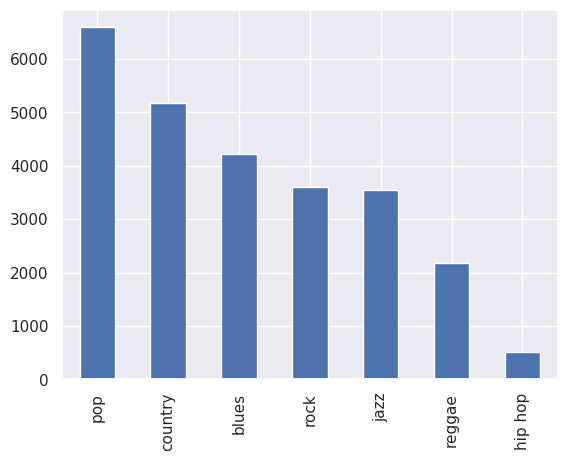

In [119]:
train['genre'].value_counts().plot.bar();

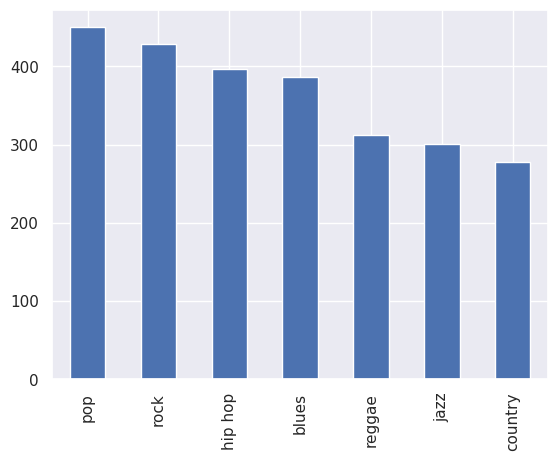

In [120]:
test['genre'].value_counts().plot.bar();

In [121]:
train["genre"].value_counts()

pop        6592
country    5167
blues      4217
rock       3605
jazz       3544
reggae     2186
hip hop     507
Name: genre, dtype: int64

Esta bastante balanceado. Pop tiene muchas más pero tambien era asi en train.